In [53]:
!git clone https://github.com/MKasaei00/AnoGraph.git

Cloning into 'AnoGraph'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 105 (delta 47), reused 77 (delta 31), pack-reused 0
Receiving objects: 100% (105/105), 5.13 MiB | 2.94 MiB/s, done.
Resolving deltas: 100% (47/47), done.
Updating files: 100% (30/30), done.


In [54]:
%cd AnoGraph/code

/content/AnoGraph/code/AnoGraph/code


In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Load the CSV file
dataset_name = 'DARPA'
file_path = f"../data/{dataset_name}/Data.csv"
data = pd.read_csv(file_path,header=None, names=['u', 'v', 'time_stamp'])

In [57]:
# Convert 'u' and 'v' to integers
data['u'] = data['u'].astype(int)
data['v'] = data['v'].astype(int)

In [58]:
data

,u,v,time_stamp
0,7577,9765,1
1,7577,9765,1
2,9764,9763,2
3,9764,9763,2
4,9765,7577,3
...,...,...,...
4554339,10215,9763,46571
4554340,10215,9763,46571
4554341,10215,9763,46571
4554342,10215,9763,46571


In [59]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4554344 entries, 0 to 4554343
Data columns (total 3 columns):
 #   Column      Dtype
---  ------      -----
 0   u           int64
 1   v           int64
 2   time_stamp  int64
dtypes: int64(3)
memory usage: 104.2 MB


In [60]:
# Descriptive statistics for u, v, and time_stamp
data.describe()

,u,v,time_stamp
count,4.554344e+06,4.554344e+06,4.554344e+06
mean,9.716706e+03,9.768405e+03,2.794812e+04
std,8.326770e+03,4.535230e+03,1.160524e+04
min,3.000000e+00,0.000000e+00,1.000000e+00
25%,2.538000e+03,7.607000e+03,2.236800e+04
50%,8.409000e+03,7.863000e+03,2.794500e+04
75%,1.139400e+04,1.013900e+04,3.785600e+04
max,2.552400e+04,2.552400e+04,4.657200e+04


In [61]:
# Calculate additional statistics
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999]
additional_stats = data.describe(percentiles=percentiles)
additional_stats

,u,v,time_stamp
count,4.554344e+06,4.554344e+06,4.554344e+06
mean,9.716706e+03,9.768405e+03,2.794812e+04
std,8.326770e+03,4.535230e+03,1.160524e+04
min,3.000000e+00,0.000000e+00,1.000000e+00
10%,2.330000e+02,7.607000e+03,1.165400e+04
25%,2.538000e+03,7.607000e+03,2.236800e+04
50%,8.409000e+03,7.863000e+03,2.794500e+04
75%,1.139400e+04,1.013900e+04,3.785600e+04
90%,2.552300e+04,1.816400e+04,4.306300e+04
95%,2.552300e+04,2.054300e+04,4.429300e+04


In [62]:
# @title Most repeated values

# Display most repeated values
most_repeated_values_u = data['u'].value_counts().head()
most_repeated_values_v = data['v'].value_counts().head()
most_repeated_values_time = data['time_stamp'].value_counts().head()

# Convert the most repeated values to dataframes for better display
most_repeated_u_df = pd.DataFrame(most_repeated_values_u).reset_index()
most_repeated_u_df.columns = ['Value', 'Count']

most_repeated_v_df = pd.DataFrame(most_repeated_values_v).reset_index()
most_repeated_v_df.columns = ['Value', 'Count']

most_repeated_time_df = pd.DataFrame(most_repeated_values_time).reset_index()
most_repeated_time_df.columns = ['Value', 'Count']

In [63]:
display(most_repeated_u_df)
display(most_repeated_v_df)
display(most_repeated_time_df)

,Value,Count
0,233,1024185
1,25523,499613
2,9763,281555
3,10215,250796
4,2538,224542


,Value,Count
0,7607,1639430
1,7863,646164
2,9763,347190
3,8117,233892
4,10215,201902


,Value,Count
0,11654,65009
1,14975,64169
2,14974,26548
3,14976,22054
4,27963,13252


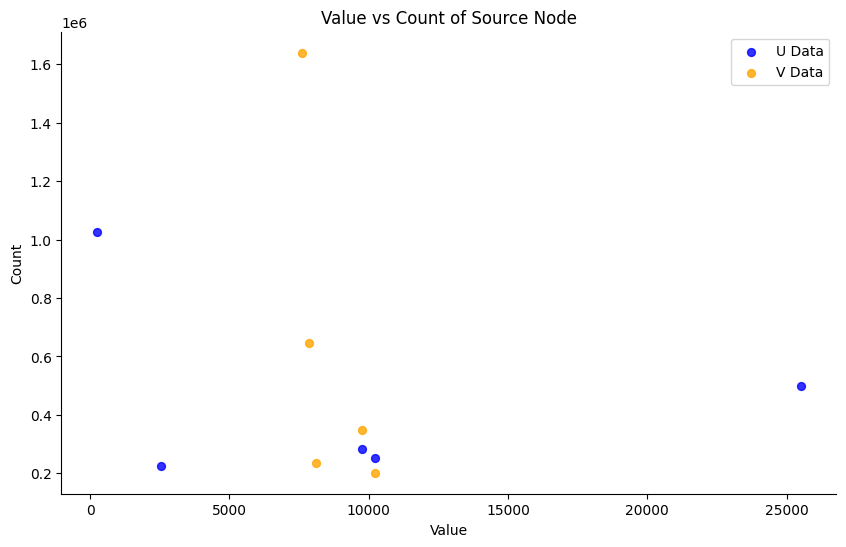

In [64]:
# @title Scatter plot for u(source nodes) , v(destination nodes)

from matplotlib import pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot data from most_repeated_u_df in blue
plt.scatter(most_repeated_u_df['Value'], most_repeated_u_df['Count'], color='blue', s=32, alpha=0.8, label='U Data')

# Plot data from most_repeated_v_df in orange
plt.scatter(most_repeated_v_df['Value'], most_repeated_v_df['Count'], color='orange', s=32, alpha=0.8, label='V Data')

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Value vs Count of Source Node')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()

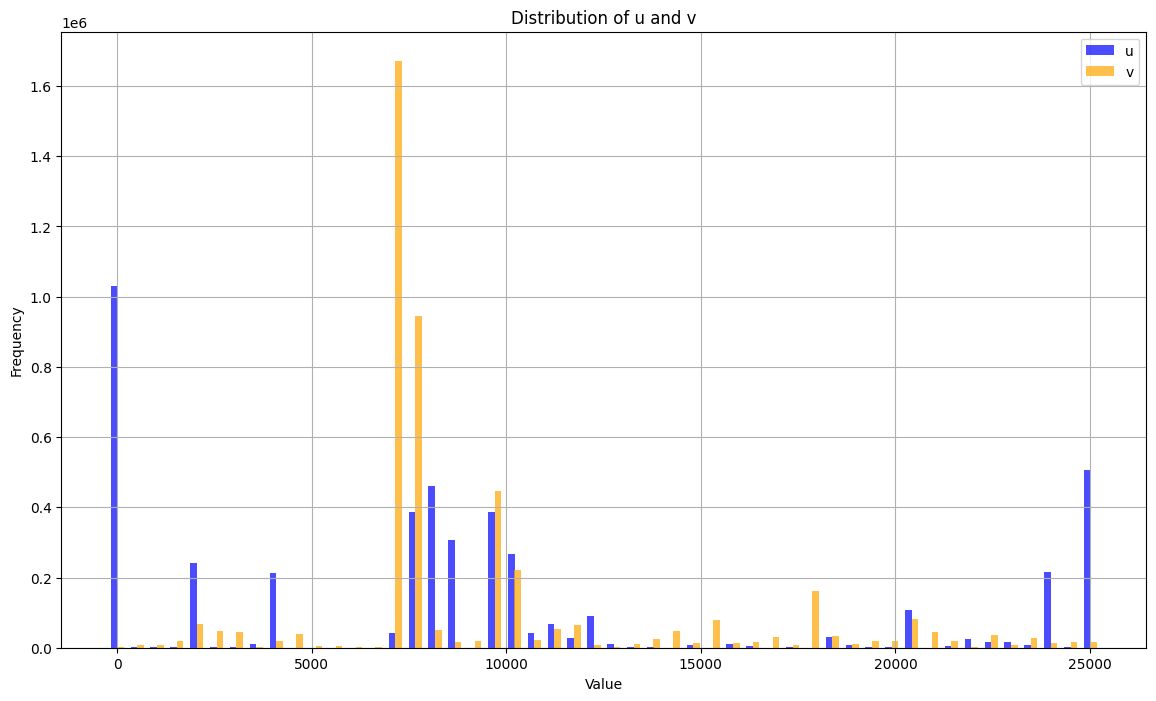

In [65]:
# @title Visualizing Source and Destination Node Distributions with Multi-Bar Histograms

def plot_multi_bar_distribution(u_column, v_column, bins=50):
    plt.figure(figsize=(14, 8))

    u_counts, u_bins = np.histogram(u_column, bins=bins)
    v_counts, v_bins = np.histogram(v_column, bins=bins)

    width = (u_bins[1] - u_bins[0]) / 3
    plt.bar(u_bins[:-1] - width/2, u_counts, width=width, color='blue', alpha=0.7, label='u')
    plt.bar(v_bins[:-1] + width/2, v_counts, width=width, color='orange', alpha=0.7, label='v')

    plt.title('Distribution of u and v')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot multi-bar distributions for u and v
plot_multi_bar_distribution(data['u'], data['v'])

In [66]:
data['time_stamp']

0              1
1              1
2              2
3              2
4              3
           ...  
4554339    46571
4554340    46571
4554341    46571
4554342    46571
4554343    46572
Name: time_stamp, Length: 4554344, dtype: int64

# Analysis of the graph's final state


In [67]:
# @title Calculate in-degree and out-degree for every node
in_degree = data['v'].value_counts()
out_degree = data['u'].value_counts()
degree_df['total_degree'] = degree_df['in_degree'] + degree_df['out_degree']

In [68]:
# Create a DataFrame for degrees
degree_df = pd.DataFrame({
    'node': list(set(data['u']).union(set(data['v']))),
    'in_degree': in_degree,
    'out_degree': out_degree
}).fillna(0).astype(int)

# Add a new column that is the sum of in-degree and out-degree
degree_df['total_degree'] = degree_df['in_degree'] + degree_df['out_degree']

# Display the new DataFrame
display(degree_df)

,node,in_degree,out_degree,total_degree
0,0,21,0,21
1,1,21,0,21
2,2,84,0,84
3,3,0,777,777
4,4,0,1,1
...,...,...,...,...
25520,25520,36,0,36
25521,25521,99,0,99
25522,25522,0,1001,1001
25523,25523,0,499613,499613


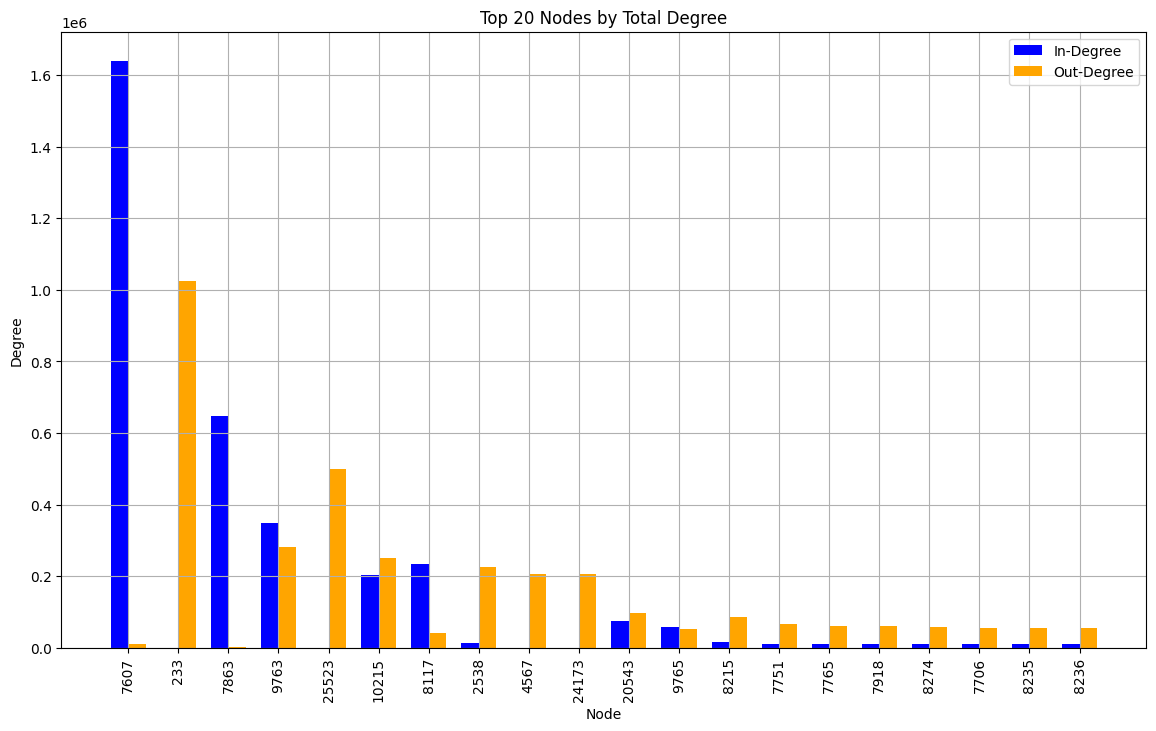

In [69]:
# @title Find the top k nodes by total degree
k = 20
top_k_nodes = degree_df.nlargest(k, 'total_degree')

# Plot multi-bar chart
plt.figure(figsize=(14, 8))
width = 0.35
x = np.arange(len(top_k_nodes['node'].astype(str)))

plt.bar(x - width/2, top_k_nodes['in_degree'], width, label='In-Degree', color='blue')
plt.bar(x + width/2, top_k_nodes['out_degree'], width, label='Out-Degree', color='orange')

plt.xlabel('Node')
plt.ylabel('Degree')
plt.title(f'Top {k} Nodes by Total Degree')
plt.xticks(x, top_k_nodes['node'].astype(str), rotation=90)
plt.legend()
plt.grid(True)
plt.show()